# PLANT DISEASE IDENTIFICATION USING DEEP LEARNING TECHNIQUE
This project involves a comprehensive approach to plant disease identification using deep learning. The custom CNN model and pre-trained models (VGG16 and ResNet50) are utilized to classify images of plant leaves into 39 categories. The models will be evaluated for their performance, and detailed plots of training history will be generated to assess their effectiveness.

# Import Necessary Libraries and Modules
imports various libraries and modules required for data preprocessing, model building, training, and evaluation

In [ ]:
import os  # Provides a way of using operating system-dependent functionality like reading or writing to the file system
import pandas as pd  # For data manipulation and analysis, particularly with DataFrames
import numpy as np  # For numerical operations and array manipulations
import seaborn as sns  # For statistical data visualization
from PIL import Image  # Python Imaging Library for opening, manipulating, and saving image files
import cv2  # OpenCV library for computer vision tasks like reading and processing images
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels into numeric values
from tensorflow.keras.preprocessing import image  # For preprocessing image data
import tensorflow as tf  # Main TensorFlow library for machine learning tasks
from tensorflow import keras  # High-level API for TensorFlow for building and training models
from tensorflow.keras.models import Model  # For defining and manipulating Keras models
from tensorflow.keras import layers, models  # For defining and constructing neural network layers and models
from tensorflow.keras.applications.vgg16 import preprocess_input  # For preprocessing images to be input to the VGG16 model
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import LabelBinarizer  # For converting categorical labels to binary matrices
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler  # For managing model checkpoints and learning rate schedules
from tensorflow.keras.metrics import Precision, Recall  # For calculating precision and recall metrics during model evaluation
from tensorflow.keras.optimizers import Adam  # Adam optimizer for model training
from tensorflow.keras.metrics import categorical_crossentropy  # For measuring categorical cross-entropy loss during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For generating batches of tensor image data with real-time data augmentation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization  # For building CNN layers
from tensorflow.keras import regularizers  # For regularization techniques to prevent overfitting
from sklearn.metrics import confusion_matrix, classification_report  # For evaluating model performance with confusion matrix and classification report
from tensorflow.keras.applications import VGG16, ResNet50  # For loading pre-trained VGG16 and ResNet50 models


In [ ]:
# Import the drive module from the google.colab package.
from google.colab import drive

# Mount Google Drive to access files stored there.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path to  dataset on Google Drive
dataset_directory = '/content/drive/MyDrive/Plant_leave_diseases_dataset_without_augmentation'

# List all class folders in the dataset directory
class_directories = os.listdir(dataset_directory)

# Initialize lists to store image paths and corresponding labels
all_image_paths = []
all_labels = []

# Iterate over each class directory
for class_directory in class_directories:
    # Path to the current class directory
    class_directory_path = os.path.join(dataset_directory, class_directory)

    # List all image files in the current class directory
    image_files = os.listdir(class_directory_path)

    # Iterate over each image file
    for image_file in image_files:
        # Full path to the image file
        image_file_path = os.path.join(class_directory_path, image_file)

        # Append the image path and class label to the lists
        all_image_paths.append(image_file_path)
        all_labels.append(class_directory)

# Create a DataFrame with image paths and labels
dataframe = pd.DataFrame({'image_path': all_image_paths, 'label': all_labels})


In [ ]:
# Split the data into training+validation and test sets
train_val_df, test_df = train_test_split(dataframe, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

# Define function to load and preprocess images
def load_and_preprocess_images(df, target_size):
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = row['image_path']
        img_label = row['label']
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)  # Modify according to model requirements
        images.append(img_array)
        labels.append(img_label)
    return np.array(images), np.array(labels)


#Exploratory Data Analysis
Provides insights into the dataset by showing class distribution and sample images. It helps in understanding the dataset’s structure, the number of samples per class, and visual examples of each class, which is crucial for assessing data quality and model training.

In [ ]:
# Display the first few rows of the DataFrame
print(dataframe.head())


                                          image_path                     label
0  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch
1  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch
2  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch
3  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch
4  /content/drive/MyDrive/Plant_leave_diseases_da...  Strawberry___Leaf_scorch


In [ ]:
# Print the unique class labels
print("The classes:\n", np.unique(dataframe['label']))


The classes:
 ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Background_without_leaves' 'Blueberry___healthy'
 'Cherry___Powdery_mildew' 'Cherry___healthy'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Corn___Common_rust'
 'Corn___Northern_Leaf_Blight' 'Corn___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

<ipython-input-8-585f0341c820>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h', palette=palette)


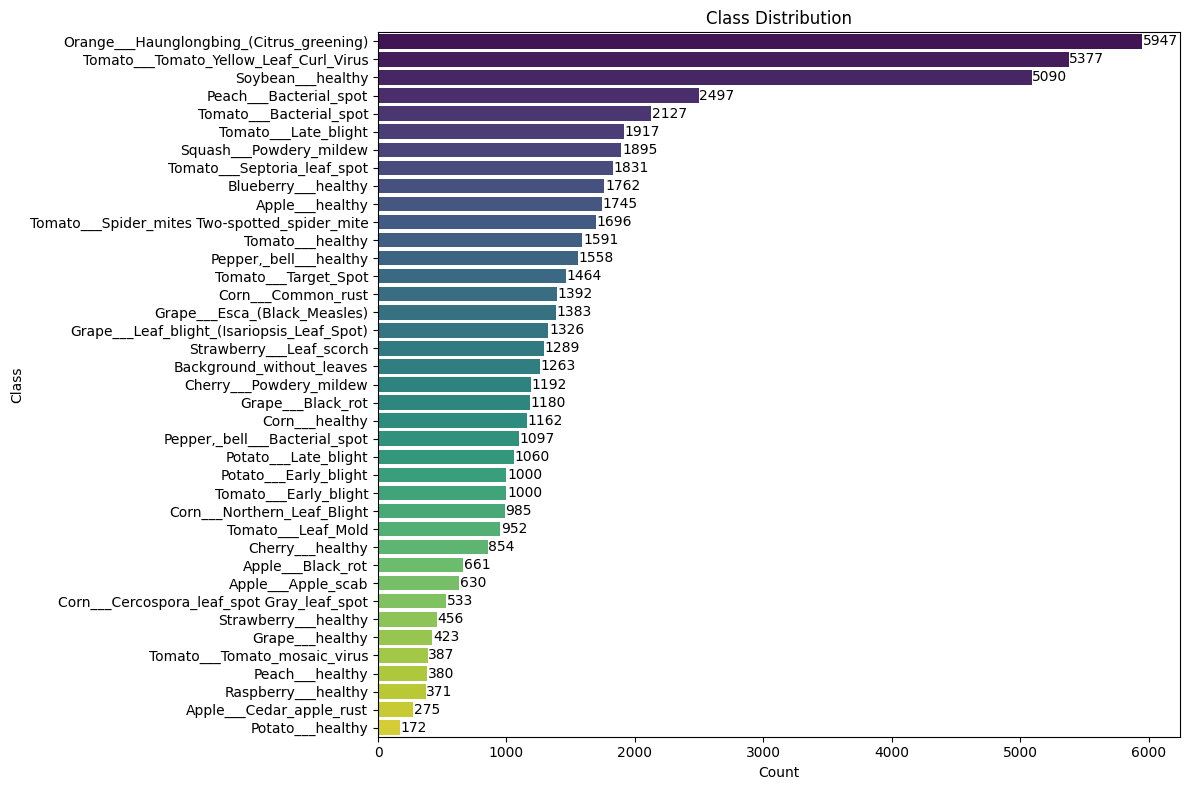

In [ ]:
# count of each class label
class_counts = dataframe['label'].value_counts()

# Set up figure size
plt.figure(figsize=(12, 8))

# Create a color palette with a fixed number of colors
num_classes = len(class_counts)
palette = sns.color_palette("viridis", num_classes)  # Generate a color palette with 'num_classes' colors

# create horizontal bar plot with the color palette
ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h', palette=palette)

#titles and labels
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.tight_layout()

# Annotate the bar plot with the counts
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

# Display the plot
plt.show()


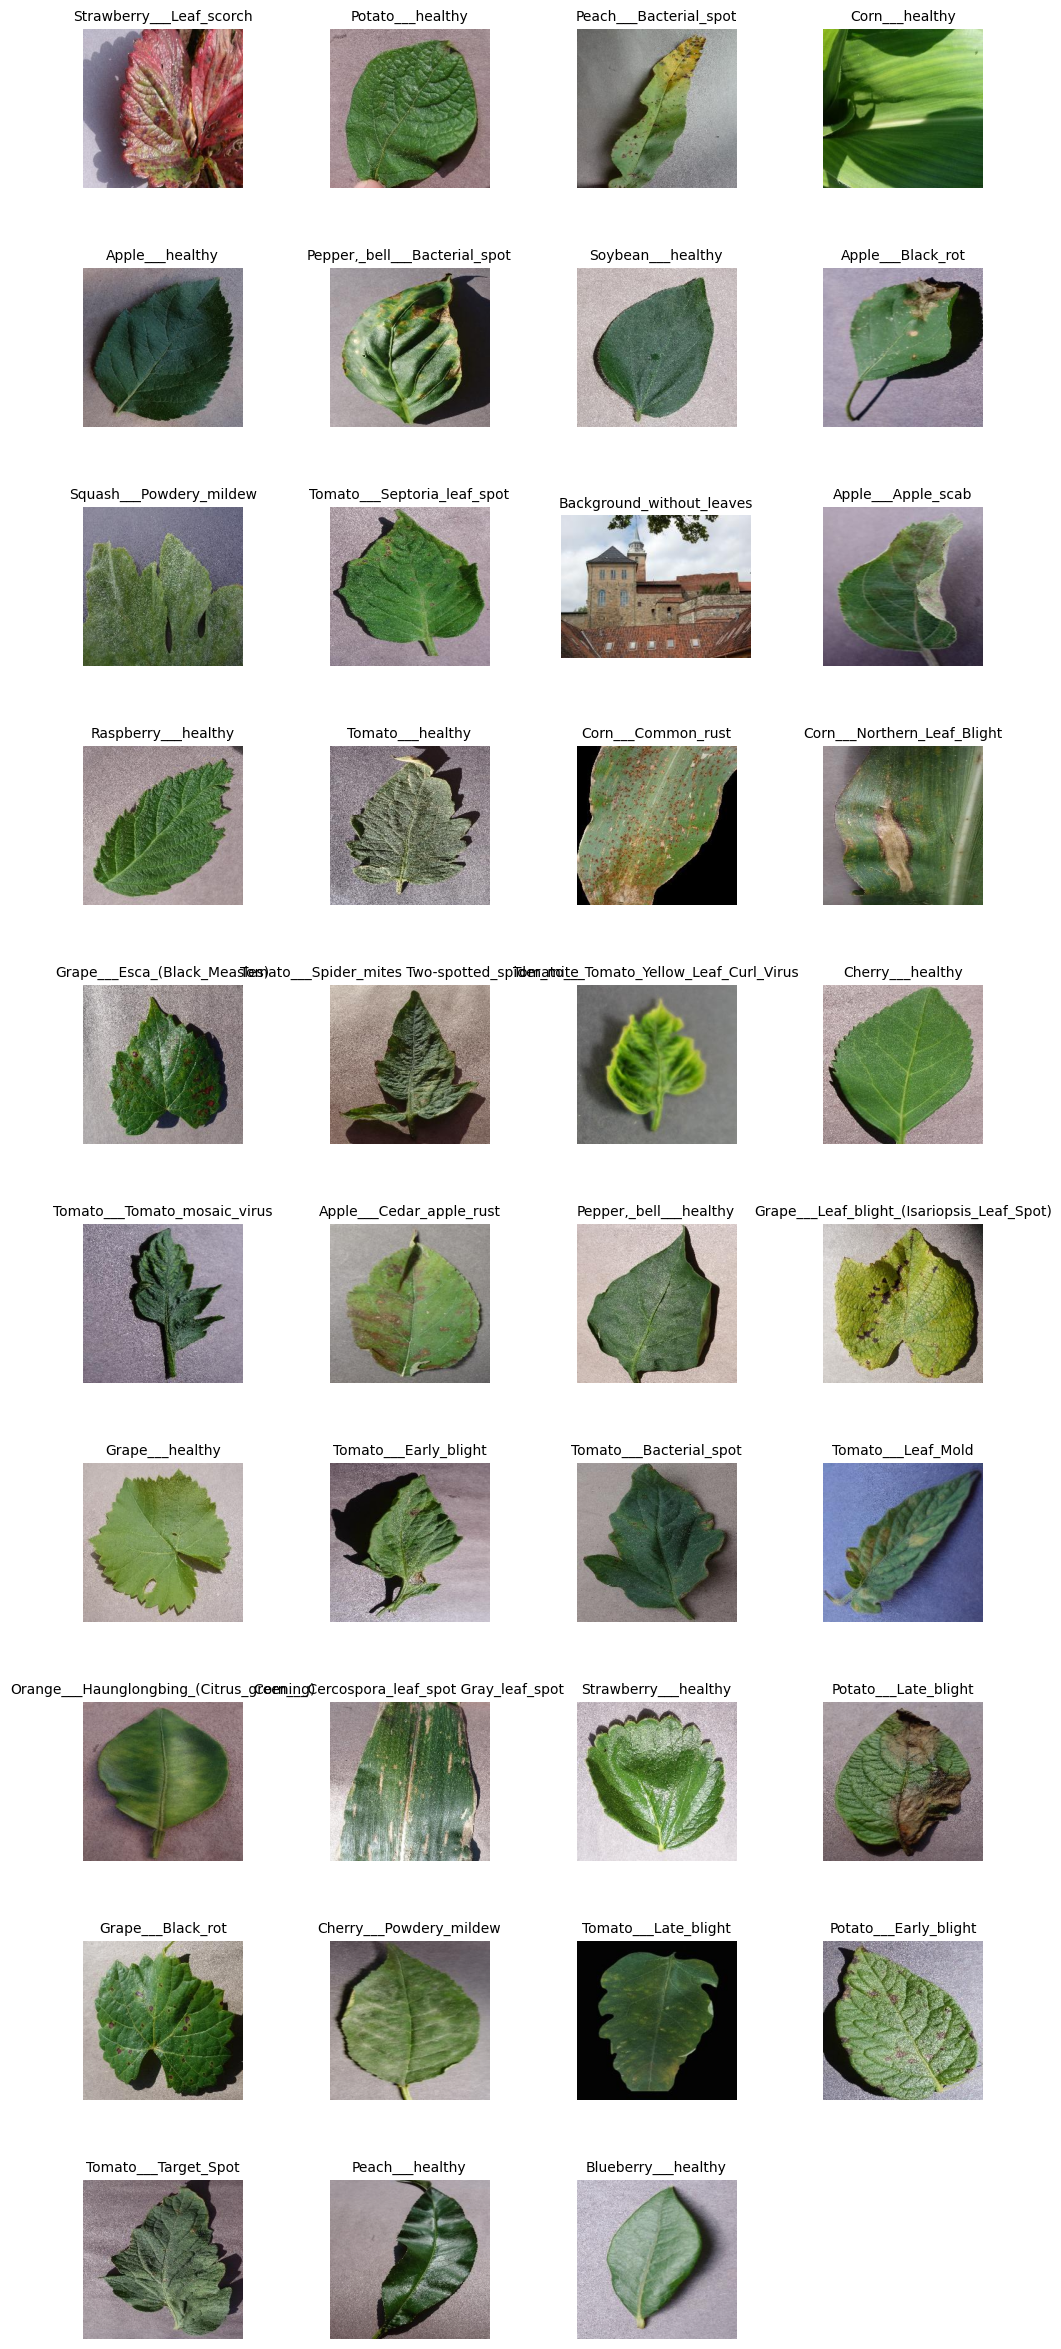

In [ ]:
# Number of unique classes
num_classes = len(dataframe['label'].unique())

# Number of images per row
num_images_per_row = 4

# Calculate the number of rows needed
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

# Set up the figure size
plt.figure(figsize=(12, 3 * num_rows))

# Plot each class
for i, plant_class in enumerate(dataframe['label'].unique()):
    plt.subplot(num_rows, num_images_per_row, i + 1)

    # Get path to the first image of this class
    path = os.path.join(dataset_directory, dataframe[dataframe['label'] == plant_class]['image_path'].iloc[0])

    # check image path  and read the image
    if os.path.exists(path):
        sample_image = cv2.imread(path)
        if sample_image is not None:
            # Convert image from BGR to RGB
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.title(plant_class, fontsize=10)
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {path}")
    else:
        print(f"Error: Image path does not exist: {path}")

#Reduce space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust horizontal and vertical spacing

# Display the plot
plt.show()
